In [1]:
from qiskit.providers.ibmq.runtime import UserMessenger
from qiskit import Aer
import matplotlib.pyplot as plt 
from qiskit import IBMQ
from runtime_code import main
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-csic', group='internal', project='iff-csic')  

## Data for the runtime program

In [2]:
meta = {
  "name": "VQS_2spins",
  "description": "Variational Quantum Simulation of two spins",
  "max_execution_time": 300000
}

meta["Input parameters"] = [
    {"name": "shots", "description": "number of shots", "type": "int", "required": True },
    {"name": "dt", "description": "time step", "type": "float", "required": True}, 
    {"name": "Nt", "description": "Number of steps", "type": "int", "required": True},

  ]

meta['Returns'] = [
    {"name": "result", "description": "Final result in a dictionary.", "type": "dict"}
  ]

meta["Interim results"] = [
    {"name": "params", "description": "parameters", "type": "ndarray"},
  ]


## First upload of the runtime program

In [3]:
#provider.runtime.upload_program(data='runtime_code.py', metadata=meta)

## Update of the runtime program

In [4]:
program_id = 'vqs-2spins-rNp0Pr3lMN'
provider.runtime.update_program(data='runtime_code.py', metadata=meta, program_id=program_id)

In [5]:
prog = provider.runtime.program(program_id)
print(prog)

vqs-2spins-rNp0Pr3lMN:
  Name: VQS_2spins
  Description: Variational Quantum Simulation of two spins
  Creation date: 2022-02-23T20:49:09.69089Z
  Update date: 2022-02-25T20:26:26.775193Z
  Max execution time: 300000
  Input parameters:
    none
  Interim results:
    none
  Returns:
    none


## Setting the inputs

In [6]:
inputs = { "shots" : 2**13,
            "dt"   : 0.01,
            "Nt"   : 100 }

## Testing the runtime program localy

In [7]:
#results = main( Aer.get_backend('aer_simulator'), UserMessenger, inputs["shots"], inputs["dt"], inputs["Nt"] )
#plt.plot( results['params'] )

## Choosing backend

In [8]:
#backend = Aer.get_backend('aer_simulator')
#backend = provider.backend.ibmq_qasm_simulator
#backend = provider.get_backend('ibmq_guadalupe')
#backend = provider.get_backend('ibmq_quito')
#backend = provider.get_backend('ibm_cairo')
backend = provider.get_backend('ibmq_lima')
options = {'backend_name': backend.name()}

## Running the runtime program in the experimental backend

In [9]:
#job = provider.runtime.run(program_id, options=options, inputs=inputs )
#job.job_id()

In [10]:
#ibmq_qasm_simulator 'c8b9sb1g1081sbjs82n0'
#ibmq_guadalupe      'c8ba6d3ec8d9aqac8cfg'
#ibmq_quito          'c8ba6jtd07hgb6ucushg'
#ibm_cairo           'c8bajbbec8d9aqacal7g'
#ibm_lima            'c8bbb4hg1081sbjsgedg'

## Loading the experimental results

In [11]:
job = provider.runtime.job('c8bbb4hg1081sbjsgedg')
results = job.result()

In [14]:
results

{'params': array([[1.        , 1.        ],
        [1.00673549, 0.98686665],
        [1.01539764, 0.97717219],
        [1.02067351, 0.96614001],
        [1.02918811, 0.95492824],
        [1.03957325, 0.94444392],
        [1.04685903, 0.93339789],
        [1.05151712, 0.92322271],
        [1.0587638 , 0.91354923],
        [1.06456614, 0.90496262],
        [1.07078905, 0.89399387],
        [1.07666966, 0.88503755],
        [1.08360419, 0.8728844 ],
        [1.08517201, 0.86390265],
        [1.08808635, 0.8551125 ],
        [1.09117329, 0.84661001],
        [1.09675892, 0.83527144],
        [1.10142157, 0.82513728],
        [1.10673807, 0.81636988],
        [1.109826  , 0.80776321],
        [1.11523637, 0.7993389 ],
        [1.11793948, 0.79096188],
        [1.12232322, 0.78165166],
        [1.1281866 , 0.77100263],
        [1.13090633, 0.76028171],
        [1.12976268, 0.74902904],
        [1.13161252, 0.73892236],
        [1.13587135, 0.72876764],
        [1.14155642, 0.71938671],
    

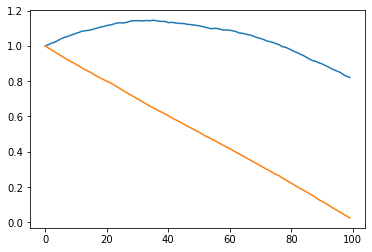

In [12]:
plt.plot( results['params'] )